# Polynomial Regression

In [1]:
import numpy as np

Data generation (demonstration perpose)

In [17]:
np.random.seed(42)
x = 1 + 2 * np.random.normal(0, 1, 1000)
y = x + 1.5 * ( x ** 2 ) + 0.8 * ( x ** 3 ) + np.random.normal(0, 3, 1000)

scatterplot

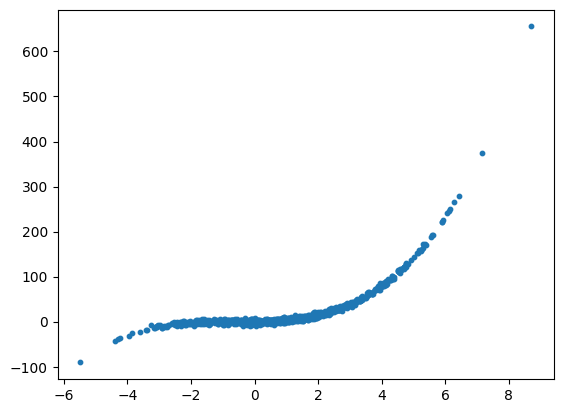

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x, y, s=10)
plt.show()

split the data into 2 sets

In [23]:
import sklearn.model_selection

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.25, random_state=1)


Train a simple linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1, 1), y_train)

print('degree 1 -  Training error:', lin_reg.score(x_train.reshape(-1, 1), y_train))
print('degree 1 -  Validation error:', lin_reg.score(x_val.reshape(-1, 1), y_val))

degree 1 -  Training error: 0.5190374263736746
degree 1 -  Validation error: 0.5663801663533035


Train Polynominal model

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
x_poly2 = poly_features.fit_transform(x_train.reshape(-1, 1))
lin_reg1 = LinearRegression()
lin_reg1.fit(x_poly2, y_train)

LinearRegression()

In [30]:
x_polyval2 = poly_features.fit_transform(x_val.reshape(-1, 1))
print('degree 2 -  Training error:', lin_reg1.score(x_poly2, y_train))
print('degree 2 -  Validation error:', lin_reg1.score(x_polyval2, y_val))

degree 2 -  Training error: 0.8631636886023732
degree 2 -  Validation error: 0.9138485534450607


for degree 3

In [31]:
poly_features2 = PolynomialFeatures(degree=3)
x_poly3 = poly_features2.fit_transform(x_train.reshape(-1, 1))
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly3, y_train)

LinearRegression()

In [32]:
x_polyval3 = poly_features2.fit_transform(x_val.reshape(-1, 1))
print('degree 3 -  Training error:', lin_reg2.score(x_poly3, y_train))
print('degree 3 -  Validation error:', lin_reg2.score(x_polyval3, y_val))

degree 3 -  Training error: 0.9951707829270384
degree 3 -  Validation error: 0.9966708951495359


for degree 20

In [34]:
poly_features3 = PolynomialFeatures(degree=20)
x_poly4 = poly_features3.fit_transform(x_train.reshape(-1, 1))
lin_reg3 = LinearRegression()
lin_reg3.fit(x_poly4, y_train)
x_polyval4 = poly_features3.fit_transform(x_val.reshape(-1, 1))
print('degree 3 -  Training error:', lin_reg3.score(x_poly4, y_train))
print('degree 3 -  Validation error:', lin_reg3.score(x_polyval4, y_val))

degree 3 -  Training error: 0.987448492279349
degree 3 -  Validation error: -15.092995623515787


Graph

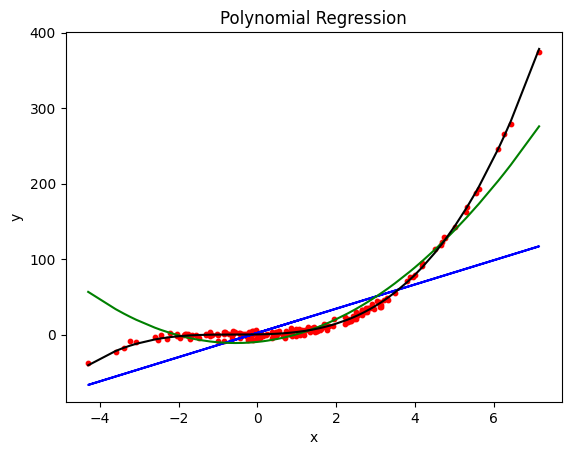

In [35]:
plt.scatter(x_val, y_val, s=10, color='red')
plt.plot(x_val, lin_reg.predict(x_val.reshape(-1, 1)), color='blue')
x2,y2 = zip(*sorted(zip(x_val, lin_reg1.predict(x_polyval2)),key = lambda x: x[0]))
plt.plot(x2, y2, color='green')
x3,y3 = zip(*sorted(zip(x_val, lin_reg2.predict(x_polyval3)),key = lambda x: x[0]))
plt.plot(x3, y3, color='black')

plt.title('Polynomial Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Evaluvate final performance

In [38]:
test_poly = poly_features2.fit_transform(x_test.reshape(-1, 1))
print('degree 3 -  Test error:', lin_reg2.score(test_poly, y_test))

degree 3 -  Test error: 0.9947069562219599
